### Introduction to API

An API lets two pieces of software talk to each other. Just like a function, you don't know how the API works, only its inputs and outputs. An essential type of API is a REST API that allows you to access resources via the internet.

#### Pandas is an API

Pandas is actually set of software components, much of which is not even written in Python.

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

You create a dicitionary, this is just data.

In [48]:
dict = {"a":[11,21,32],"b":[12,22,32]}

When you create a Pandas object with the dataframe constructor, in API lingo this is an "instance". The data in the dictionary is passed along the pandas API. You then use the dataframe to communicate with the API.

In [50]:
df = pd.DataFrame(dict)
type(df)

pandas.core.frame.DataFrame

When ypu call the method <code>head</code> the dataframe communicates woth the API displaying the first few rows of the dataframe.

In [52]:
df.head()

,a,b
0,11,12
1,21,22
2,32,32


When you call the method <code>mean</code>, the API will calculate the mean and return the value.

In [54]:
df.mean()

a    21.333333
b    22.000000
dtype: float64

#### REST APIs

Rest APIs function by densing a request, the request is communicated via HTTP message. The HTTP message usually contains a JSON file. This contains instructions for what operatio we would like the service or resuroce ro perform. In a similar manner, API returns a response, via HTTP message, this response is usually contained within a JSON.

In this lab, we will use the NBA API to determine how well the Golden State Warrios performed against the Toronto Raptros. We will use the API to deterime the number of pints the Golden State Warriors won or lost by fer each game. So if the value is three, the Golden State Warriors won by three points. Similary if the Golden State Warriors lost by two pints the result will be negative two. The API handle a lot of the details, such Endpoints and Authentication.

We import the module <code>teams</code>

In [56]:
!pip install nba_api

In [57]:
from nba_api.stats.static import teams
import matplotlib.pyplot as plt

In [58]:
def one_dict(list_dict):
    keys = list_dict[0].keys()
    out_dict={key:[] for key in keys}
    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict

The method <code>get_teams()</code> resturns a list of dictioanries.

In [60]:
nba_teams = teams.get_teams()

The dictonary key id has a unique identifier for eah team as a value. Let's look at the firt three elements of the list:

In [62]:
nba_teams[0:3]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Georgia',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970}]

To make things easier, we can convert the dictionary to a table. First, we use the function <code>one dict</code>, to create a dictionary. We use the common keys for each team as the keys, the value is a list; each element of the list corresponds to the value for each team. We then convert the dictionary to a dataframe, each row contains the information for a different team  

In [64]:
dict_nba_team = one_dict(nba_teams)
df_teams=pd.DataFrame(dict_nba_team)
df_teams.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


We will use the team's nickname to fin the unique id, we can see the wor that contains the warriors by using the column nickname as follows:

In [81]:
df_warriors = df_teams[df_teams["nickname"]=="Warriors"]
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


We can use the following line of code to access the first column of tha DataFrame:

In [84]:
id_warriors = df_warriors[["id"]].values[0][0]
id_warriors

1610612744

The function "League Game Finder" will make an API call, it's in the module <code>stats.endpoints</code>

In [87]:
from nba_api.stats.endpoints import leaguegamefinder

The parameter <code>team_id_nullable</code> is the unqiue ID for the warriors. Under the hood, the NBA API is making a HTTP request. The infrmation requested is provided and is transmitted bia an HTTP response this assigned to the object <code_game finder</code>.

In [90]:
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)

The game finder oect has a method <code>get_data_frames()</code>, that returns a dataframe. If we view tghe dataframe, we can see it contains information about all the games the Warriors played. The <code>PLUS_MINUS</code> column contains information on the score, if the value is negative, the Warriors lost by that math points, if the value is positive, the warriors won by that amount of points. The column <code>MATCHUP</code> has the team the Warriors were playing, GSW stands for Golden State Warriors and TOR means Tornto Raptos. <code>vs</code> singifies it was a ohme game and the <code>@</code> symbol means an away game

In [93]:
games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22024,1610612744,GSW,Golden State Warriors,1522400070,2024-07-21,GSW @ MIA,L,199,99,...,0.760,13.0,34.0,47.0,26,6,2,15,21,-3.0
1,22024,1610612744,GSW,Golden State Warriors,1522400059,2024-07-19,GSW @ OKC,W,199,90,...,0.810,9.0,28.0,37.0,23,7,3,18,17,9.2
2,22024,1610612744,GSW,Golden State Warriors,1522400045,2024-07-17,GSW @ CLE,W,199,96,...,0.810,9.0,36.0,45.0,23,8,1,18,12,6.8
3,22024,1610612744,GSW,Golden State Warriors,1522400023,2024-07-14,GSW vs. CHI,W,199,92,...,0.769,12.0,28.0,40.0,21,9,6,16,20,6.6
4,22024,1610612744,GSW,Golden State Warriors,1522400015,2024-07-13,GSW vs. PHX,W,199,90,...,0.750,12.0,34.0,46.0,22,11,7,19,20,15.0


You can download the dataframe from the API call for Golden State and run the rest like a video.

In [104]:
import requests

filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%205/Labs/Golden_State.pkl"

def download(url,filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename,"wb") as f:
            f.write(response.content)
            
download(filename,"Golden_State.pkl")

In [105]:
file_name = "Golden_State.pkl"
games = pd.read_pickle(file_name)
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612744,GSW,Golden State Warriors,1521900066,2019-07-12,GSW vs. LAL,L,200,87,...,0.800,13.0,29.0,42.0,13,10.0,3,11.0,21,3.2
1,22019,1610612744,GSW,Golden State Warriors,1521900058,2019-07-10,GSW @ DEN,W,201,73,...,0.867,7.0,27.0,34.0,10,11.0,7,20.0,20,-8.0
2,22019,1610612744,GSW,Golden State Warriors,1521900039,2019-07-08,GSW @ LAL,W,200,88,...,0.621,8.0,29.0,37.0,21,10.0,4,13.0,22,8.0
3,22019,1610612744,GSW,Golden State Warriors,1521900020,2019-07-07,GSW vs. TOR,W,201,80,...,0.923,6.0,37.0,43.0,18,8.0,3,20.0,25,10.0
4,22019,1610612744,GSW,Golden State Warriors,1521900007,2019-07-05,GSW vs. CHA,L,200,85,...,0.889,8.0,28.0,36.0,19,9.0,3,13.0,15,-8.0


We can create two dataframes, one fot the games that the Warriors faced the raptos at home, and the second for away games.

In [109]:
games_home = games[games["MATCHUP"]=="GSW vs. TOR"]
games_away = games[games["MATCHUP"]=="GSW @ TOR"]

We can calculate the mean for the column<code>PLUS_MINUS</code> fot the dataframes <code>games_home</code> and <code>games_away</code>:

In [118]:
games_home["PLUS_MINUS"].mean()

3.730769230769231

In [120]:
games_away["PLUS_MINUS"].mean()

-0.6071428571428571

We can plot out the <code>PLUS MINUS</code> column for the dataframes <code>games_home</code> and <code>games_away</code>. We see the warriors played better at home.  

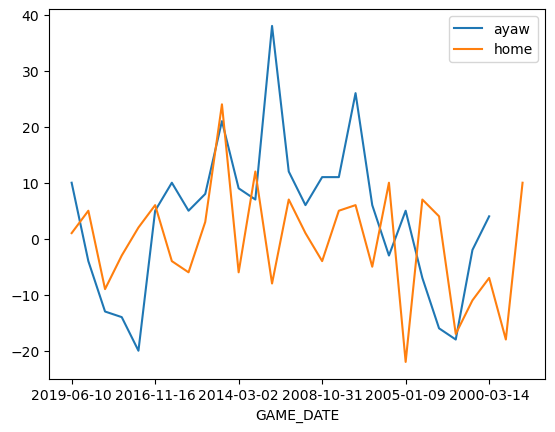

In [125]:
fig, ax = plt.subplots()

games_home.plot(x="GAME_DATE",y="PLUS_MINUS",ax=ax)
games_away.plot(x="GAME_DATE",y="PLUS_MINUS",ax=ax)

ax.legend(["ayaw","home"])
plt.show()

#### Quiz 

Calculate the mean for the columns <code>PTS</code> for the datagrames <code>games_home</code> and <code>games_away</code>.

In [128]:
games_home["PTS"].mean()

106.8076923076923

In [130]:
games_away["PTS"].mean()

102.96428571428571